<a href="https://colab.research.google.com/github/wilbertcaine/MATH4432/blob/main/Assignment%204/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
install.packages("gbm")
library(gbm)
# source("/import/home/mcaiad/Documents/courses/hw4/adaboost.R")  # implement your own adaboost here
niter <- 1000 # number of trees to grow in adaboost

# read training data
# data_train <- read.table("/import/home/mcaiad/Documents/courses/hw4/data_train.txt",header = T)
# https://drive.google.com/file/d/1nJ-XCEB6ums9Rew1GBvhnVM3aU7GJNAu/view?usp=sharing
system("gdown --id 1nJ-XCEB6ums9Rew1GBvhnVM3aU7GJNAu")
data_train <- read.table("data_train.txt",header = T)
y <- data_train$y
x <- data.matrix(data_train[,-1])

# read testing data
# data_test <- read.table("/import/home/mcaiad/Documents/courses/hw4/data_test.txt",header = T)
# https://drive.google.com/file/d/122ZTJSrQGRvZctLji-EdzQWSxI7Pis-m/view?usp=sharing
system("gdown --id 122ZTJSrQGRvZctLji-EdzQWSxI7Pis-m")
data_test <- read.table("data_test.txt",header = T)
hold.out.y <- data_test$y
hold.out.x <- data.matrix(data_test[,-1])

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [47]:
library(rpart)
library(repr)

set.seed(1)

adaboost <- function(x,y,x2,m = 1000,treedepth = 1,minsplit = 1,minbucket = 1){

  n <- length(y)
  rpart_crtl <- rpart.control(minsplit = minsplit,minbucket = minbucket,maxdepth = treedepth)
  
  M = m
  w <- matrix(1/n,n,M+1)
  p <- matrix(0,n,M)
  e <- matrix(0,M)
  a <- matrix(0,M)
  trees <- list()
  for(m in 1:M){
    # a
    dat <- data.frame(x=x,y=y)
    fit_tree <- rpart(y~.,dat,weights=w[,m],method = "class",control = rpart_crtl)
    pred <- predict(fit_tree,type="class")
    p[,m] <- pred==y
    # b
    e[m] <- sum(w[,m] * (pred != y))
    a[m] <- log((1 - e[m]) / e[m])
    # c
    w[,m+1] <- w[,m] * exp(a[m] * (pred != y))
    w[,m+1] <- w[,m+1] / sum(w[,m+1])
    trees[[m]] <- fit_tree
  }
  ret <- list(M=M,w=w,p=p,e=e,a=a,trees=trees)
  class(ret) <- "adaboost"
  return(ret)
}

predict.adaboost <- function(object,x){
  n = nrow(x)
  f <- matrix(0,n,object$M)
  prediction <- matrix(0,n,object$M)
  m = 1
  f[,m] = object$a[m] * as.integer(predict(object$trees[[m]],newdata=data.frame(x=x),type="class"))
  prediction[,m] = sign(f[,m])
  for(m in 2:object$M){
    f[,m] = f[,m-1] + object$a[m] * as.integer(predict(object$trees[[m]],newdata=data.frame(x=x),type="class"))
    prediction[,m] = sign(f[,m])
  }
  ret <- list(f = f,prediction = prediction)
  class(ret) <- "yh_adaboost"
  return(ret)
}

[1] 0.53

[1] 0.53

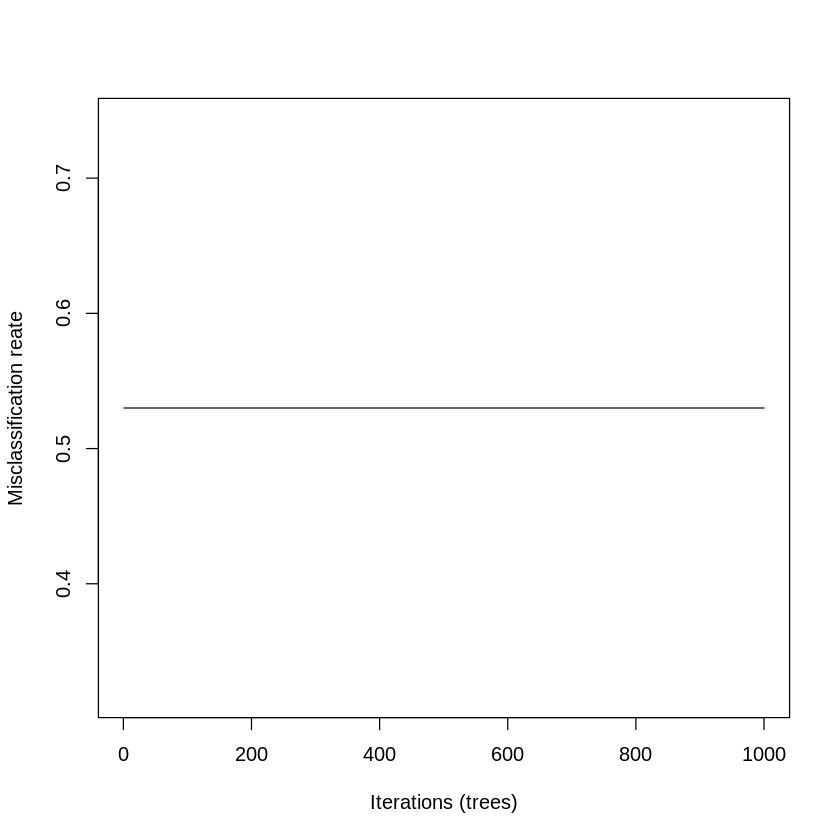

In [48]:
fit_adaboost <- adaboost(x,y,x,m = niter,treedepth = 1)
yh_adaboost <- predict(fit_adaboost,x)
plot(colMeans(yh_adaboost$prediction!=y),type="l",xlab = "Iterations (trees)",ylab="Misclassification reate")
# misclassification rate of the final model
mean(yh_adaboost$prediction[,niter]!=y)
# misclassification rate of the best model
min(colMeans(yh_adaboost$prediction!=y))

[1] 0.5

[1] 0.5

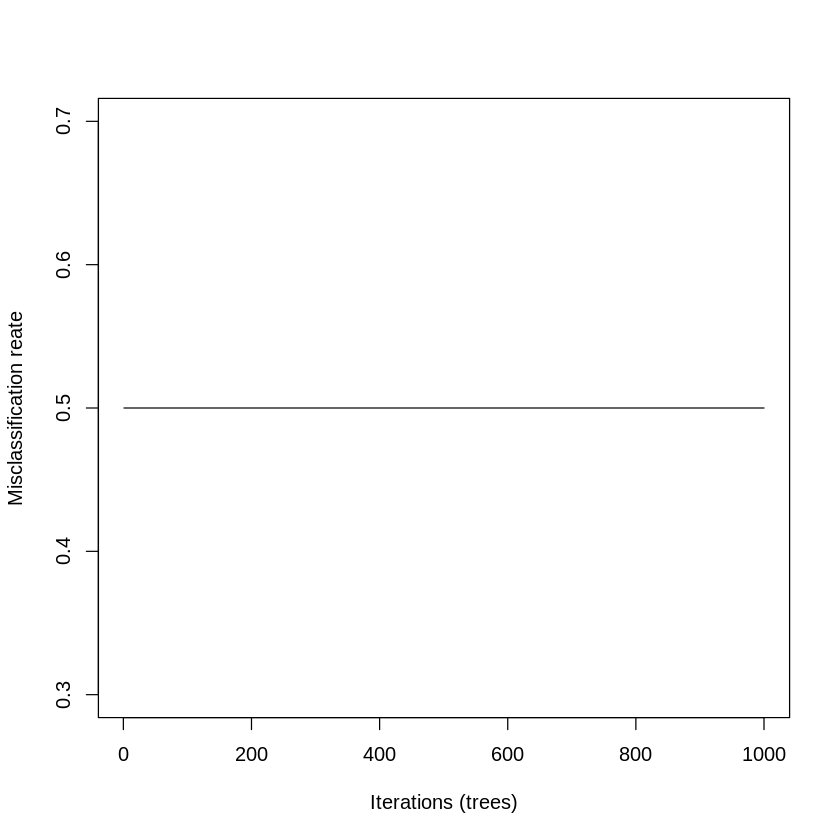

In [49]:
fit_adaboost <- adaboost(x,y,hold.out.x,m = niter,treedepth = 1)
yh_adaboost <- predict(fit_adaboost,hold.out.x)
plot(colMeans(yh_adaboost$prediction!=hold.out.y),type="l",xlab = "Iterations (trees)",ylab="Misclassification reate")
# misclassification rate of the final model
mean(yh_adaboost$prediction[,niter]!=hold.out.y)
# misclassification rate of the best model
min(colMeans(yh_adaboost$prediction!=hold.out.y))

In [44]:
fit_adaboost$w[,1]

[1] 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 [13] 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 [25] 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 [37] 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 [49] 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 [61] 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 [73] 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 [85] 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 [97] 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
[109] 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
[121] 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
[133] 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
[145] 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
[157] 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
[169] 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
[181] 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
[193] 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005

# Note

In [ ]:
library(rpart)
library(repr)

set.seed(1)

adaboost <- function(x,y,x2,m = 1000,treedepth = 1,minsplit = 1,minbucket = 1){
  n <- length(y)
  rpart_crtl <- rpart.control(minsplit = minsplit,minbucket = minbucket,maxdepth = treedepth)
  
  M = m
  w <- matrix(1/n,n,M+1)
  e <- matrix(0,M)
  a <- matrix(0,M)
  trees <- list()
  for(m in 1:M){
    # a
    dat <- data.frame(x=x,y=y)
    fit_tree <- rpart(y~.,dat,weights=w[,m],method = "class",control = rpart_crtl)
    trees[[m]] <- fit_tree
    pred <- predict(fit_tree,type="class")
    print(sum(pred==y))
    # b
    e[m] <- sum(w[,m] * (pred != y)) / sum(w[,m])
    a[m] <- log((1 - e[m]) / e[m])
    # c
    w[,m+1] <- w[,m] * exp(a[m] * (pred != y))
  }
  ret <- list(M=M,w=w,e=e,a=a,trees=trees)
  class(ret) <- "adaboost"
  return(ret)
}

predict.adaboost <- function(object,x){
  n = nrow(x)
  pred <- matrix(0,n,object$M)
  yh_adaboost$prediction <- matrix(0,n,object$M)
  m = 1
  pred[,m] = object$a[m] * as.integer(predict(object$trees[[m]],newdata=data.frame(x=x),type="class"))
  yh_adaboost$prediction[,m] = ifelse(pred[,m]>0,1,-1)
  for(m in 2:object$M){
    pred[,m] = pred[,m-1] + object$a[m] * as.integer(predict(object$trees[[m]],newdata=data.frame(x=x),type="class"))
    yh_adaboost$prediction[,m] = ifelse(pred[,m]>0,1,-1)
  }
  return(yh_adaboost)
}

fit_adaboost <- adaboost(x,y,hold.out.x,m = niter,treedepth = 1)
# fit_adaboost <- adaboost(x,y,hold.out.x,m = 10,treedepth = 1)
yh_adaboost <- predict(fit_adaboost,hold.out.x)
plot(colMeans(yh_adaboost$prediction!=hold.out.y),type="l",xlab = "Iterations (trees)",ylab="Misclassification reate")
# misclassification rate of the final model
mean(yh_adaboost$prediction[,niter]!=hold.out.y)
# misclassification rate of the best model
min(colMeans(yh_adaboost$prediction!=hold.out.y))

[1] 0.5

[1] 0.5

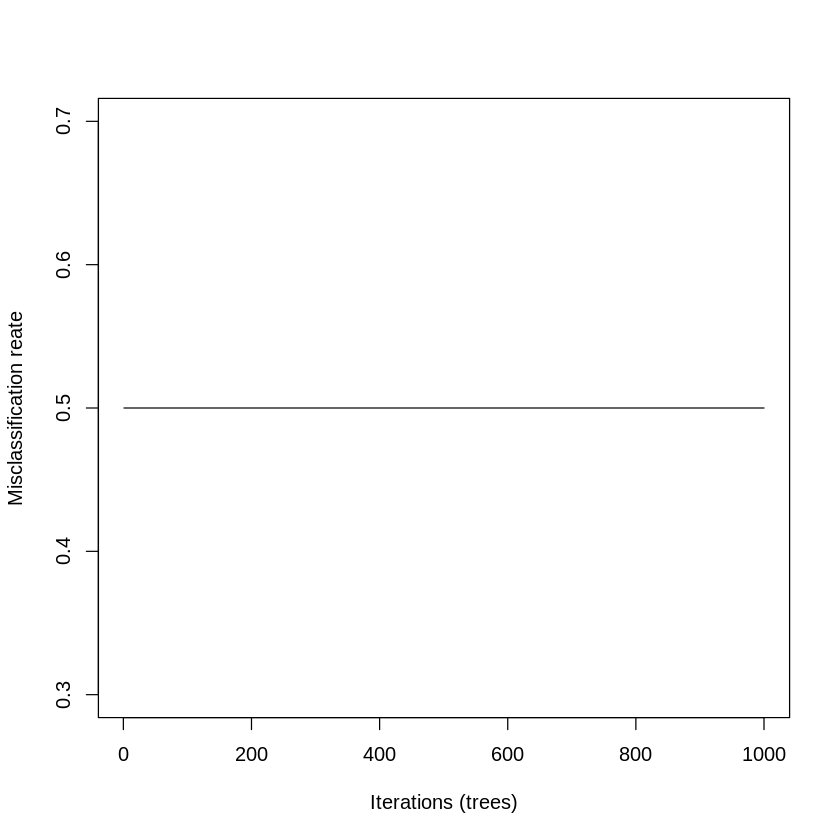

In [20]:
library(rpart)
library(repr)

set.seed(1)

adaboost <- function(x,y,x2,m = 1000,treedepth = 1,minsplit = 1,minbucket = 1){

  n <- length(y)
#   rpart_crtl <- rpart.control(minsplit = minsplit,minbucket = minbucket,maxdepth = treedepth)
  
  M = m
  w <- matrix(1/n,n,M+1)
  p <- matrix(0,n,M)
  e <- matrix(0,M)
  a <- matrix(0,M)
  trees <- list()
  for(m in 1:M){
    # a
    dat <- data.frame(x=x,y=y)
    # fit_tree <- rpart(y~.,dat,weights=w[,m],method = "class",control = rpart_crtl)
    fit_tree <- rpart(y~.,dat,weights=w[,m],method = "class")
    pred <- predict(fit_tree,type="class")
    p[,m] <- pred==y
    # b
    e[m] <- sum(w[,m] * (pred != y)) / sum(w[,m])
    a[m] <- log((1 - e[m]) / e[m])
    # c
    w[,m+1] <- w[,m] * exp(a[m] * (pred != y))
    # w[,m+1] <- w[,m] * exp(-a[m]/2) * exp(a[m] * (pred != y))
    # w[,m+1] <- w[,m+1] / sum(w[,m+1])
    trees[[m]] <- fit_tree
  }
  ret <- list(M=M,w=w,p=p,e=e,a=a,trees=trees)
  class(ret) <- "adaboost"
  return(ret)
}

predict.adaboost <- function(object,x){
  n = nrow(x)
  pred <- matrix(0,n,object$M)
  yh_adaboost <- matrix(0,n,object$M)
  m = 1
  pred[,m] = object$a[m] * as.integer(predict(object$trees[[m]],newdata=data.frame(x=x),type="class"))
  yh_adaboost[,m] = ifelse(pred[,m]>0,1,-1)
  for(m in 2:object$M){
    pred[,m] = pred[,m-1] + object$a[m] * as.integer(predict(object$trees[[m]],newdata=data.frame(x=x),type="class"))
    # print(sum(pred[100,m]))
    yh_adaboost[,m] = ifelse(pred[,m]>0,1,-1)
  }
  return(yh_adaboost)
}

fit_adaboost <- adaboost(x,y,hold.out.x,m = niter,treedepth = 1)
# fit_adaboost <- adaboost(x,y,hold.out.x,m = 10,treedepth = 1)
yh_adaboost <- predict(fit_adaboost,hold.out.x)
plot(colMeans(yh_adaboost!=hold.out.y),type="l",xlab = "Iterations (trees)",ylab="Misclassification reate")
# misclassification rate of the final model
mean(yh_adaboost[,niter]!=hold.out.y)
# misclassification rate of the best model
min(colMeans(yh_adaboost!=hold.out.y))

In [ ]:
# for (i in 1:1000){
    # print(fit_adaboost$w[i,1])
    # print(sum(fit_adaboost$e[i]))
    # print(fit_adaboost$w[i,2])
# }
# for (i in 1:niter){
#     print(sum(fit_adaboost$p[,i]))
# }
# rowSums(fit_adaboost$w[,1:9])
# sum(yh_adaboost$prediction[,niter]==1)
# yh_adaboost$prediction[,niter]
# fit_adaboost$e
# for (i in 1:100){
#     print(sum(fit_adaboost$w[,i]))
# }
# predict(fit_adaboost$trees[[m]],newdata=data.frame(x=x),type="class")!=y

[1] 0.165
[1] 0.1137725
[1] 0.1464045
[1] 0.1361065
[1] 0.1067726
[1] 0.1077456
[1] 0.102229
[1] 0.1182231
[1] 0.1155645
[1] 0.09691126
[1] 0.09989497
[1] 0.131652
[1] 0.1062128
[1] 0.1434169
[1] 0.07933428
[1] 0.08295604
[1] 0.05532619
[1] 0.1118399
[1] 0.1153169
[1] 0.09577177
[1] 0.09568586
[1] 0.1095997
[1] 0.09402753
[1] 0.09089948
[1] 0.1056748
[1] 0.111004
[1] 0.09208439
[1] 0.08135457
[1] 0.1496286
[1] 0.06999472
[1] 0.08850506
[1] 0.1028336
[1] 0.0707928
[1] 0.05498224
[1] 0.09911787
[1] 0.08749471
[1] 0.1079802
[1] 0.1069165
[1] 0.07341351
[1] 0.1485784
[1] 0.1286562
[1] 0.1103568
[1] 0.0743777
[1] 0.06008684
[1] 0.09752534
[1] 0.08731502
[1] 0.08459325
[1] 0.080212
[1] 0.08357541
[1] 0.07539869
[1] 0.05074828
[1] 0.07766904
[1] 0.09171301
[1] 0.1012928
[1] 0.05103552
[1] 0.09842248
[1] 0.06978997
[1] 0.09614775
[1] 0.09084833
[1] 0.06474754
[1] 0.07911902
[1] 0.09630805
[1] 0.09828191
[1] 0.05948379
[1] 0.07622007
[1] 0.07324064
[1] 0.08328898
[1] 0.07336548
[1] 0.1003248
[1